In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [48]:
import pickle

In [8]:
from eye_quality import dataset

X = [np.log(x+1) for x in X] 

In [9]:
x_train, x_val, y_train, y_val = \
dataset.get_dataset(eye=True, random=True, test=False, test_size=0.1, features_range=(0, 112))

Loaded kmeans model
Loaded data
Loaded data


In [10]:
x_test,y_test = dataset.get_dataset(eye=False, random=False, test=True, test_size=0, features_range=(0, 112))

Loaded kmeans model
Loaded data


data = np.stack(X)
df = np.sum(data[:,:100] > 0, axis=0)
idf = np.log(len(X)/df)
X = [np.hstack([x[:100]*idf,x[100:]]) for x in X] 

In [11]:
import xgboost as xgb

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
model = xgb.XGBClassifier(n_jobs=-1, objective='multi:softmax', 
                          num_class=3, seed=42, 
                          max_depth=15, n_estimators=100, subsample=1,
                          colsample_bytree=0.9, colsample_bylevel=0.9)

In [30]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [31]:
%%time
model.fit(x_train, y_train)
#model.fit(x_train, y_train, sample_weight=classes_weights)

CPU times: user 4min 3s, sys: 2.14 s, total: 4min 5s
Wall time: 1min 1s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_class=3, num_parallel_tree=None,
              objective='multi:softmax', ...)

In [49]:
file_name = 'xgboost.pkl'
pickle.dump(model, open(file_name, "wb"))

In [32]:
y_pred = model.predict(x_val)

In [33]:
accuracy_score(y_val, y_pred)

0.9191900766143744

In [34]:
y_pred_test = model.predict(x_test)

In [35]:
accuracy_score(y_test, y_pred_test)

0.9490740740740741

In [36]:
import numpy as np

In [37]:
np.where((y_pred_test == 2) & (np.array(y_test) == 0))[0]

array([], dtype=int64)

In [43]:
cm = np.zeros((3, 3), dtype=int)
for i in range(len(y_pred_test)):
    cm[y_test[i], y_pred_test[i]] += 1

In [44]:
from matplotlib import pyplot as plt

In [45]:
import itertools

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 91   0   0]
 [  0   0   0]
 [ 11   0 114]]


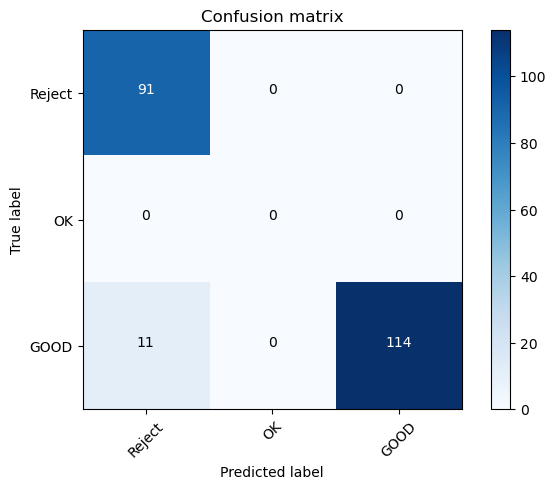

In [47]:
plot_confusion_matrix(cm, classes=['Reject', 'OK', 'GOOD'], normalize=False)

In [101]:
f = X_test[0]

In [ ]:
classifier.predict([f])

In [ ]:
classifier.feature_importances_.argmax()

In [ ]:
classifier.feature_importances_[:100].max()

In [ ]:
classifier.feature_importances_[100:].max()